> During the course of doing data analysis and modeling, a significant amount of time is spent on data preparation: loading, cleaning, transforming, and rearranging. Such tasks are often reported to take up 80% or more of an analyst’s time

# 7.1 Handling Missing Data

For numeric data, pandas uses the floating-point value NaN (Not a Number) to represent missing data

We call this a sentinel value that can be easily detected:

In [243]:
import pandas as pd

In [244]:
import numpy as np

In [245]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [246]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [247]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In pandas, we’ve adopted a convention used in the R programming language by referring to missing data as NA, which stands for not available

In statistics applications, NA data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example)

When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data

**The built-in Python None value is also treated as NA in object arrays:**

In [248]:
string_data[0] = None

In [249]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

See Table 7-1 for a list of some functions related to missing data handling

Table 7-1. NA handling methods
<p align='center'>
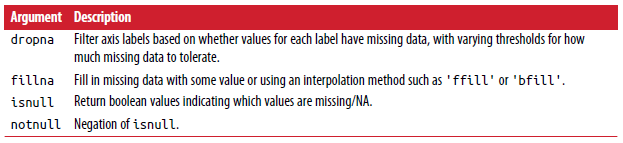
</p>

## Filtering Out Missing Data

There are a few ways to filter out missing data. While you always have the option to do it by hand using pandas.isnull and boolean indexing, the dropna can be helpful

On a Series, it returns the Series with only the non-null data and index values:

In [250]:
from numpy import nan as NA

In [251]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [252]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

This is equivalent to:

In [253]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

With DataFrame objects, things are a bit more complex

You may want to drop rows or columns that are all NA or only those containing any NAs. dropna by default drops any row containing a missing value:

In [254]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [255]:
cleaned = data.dropna()

In [256]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [257]:
cleaned

,0,1,2
0,1.0,6.5,3.0


Passing how='all' will only drop rows that are all NA:

In [258]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


To drop columns in the same way, pass axis=1:

In [259]:
data[4] = NA

In [260]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [261]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


A related way to filter out DataFrame rows tends to concern time series data

Suppose you want to keep only rows containing a certain number of observations. You can indicate this with the thresh argument:

In [262]:
df = pd.DataFrame(np.random.randn(7, 3))

In [263]:
df.iloc[:4, 1] = NA

In [264]:
df.iloc[:2, 2] = NA

In [265]:
df

,0,1,2
0,1.025788,NaN,NaN
1,0.436061,NaN,NaN
2,-1.290637,NaN,-1.298973
3,0.374550,NaN,-0.993157
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


In [266]:
df.dropna()

,0,1,2
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


In [267]:
df.dropna(thresh=2)

,0,1,2
2,-1.290637,NaN,-1.298973
3,0.374550,NaN,-0.993157
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


## Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways

For most purposes, **the fillna method is the workhorse function to use**

Calling fillna with a constant replaces missing values with that value:

In [268]:
df.fillna(0)

,0,1,2
0,1.025788,0.000000,0.000000
1,0.436061,0.000000,0.000000
2,-1.290637,0.000000,-1.298973
3,0.374550,0.000000,-0.993157
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


Calling fillna with a dict, you can use a different fill value for each column:

In [269]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,1.025788,0.500000,0.000000
1,0.436061,0.500000,0.000000
2,-1.290637,0.500000,-1.298973
3,0.374550,0.500000,-0.993157
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


fillna returns a new object, but you can modify the existing object in-place:

In [270]:
_ = df.fillna(0, inplace=True)

In [271]:
df

,0,1,2
0,1.025788,0.000000,0.000000
1,0.436061,0.000000,0.000000
2,-1.290637,0.000000,-1.298973
3,0.374550,0.000000,-0.993157
4,1.583513,2.403418,1.215801
5,1.333067,-0.826944,0.408649
6,1.556253,0.110479,0.017437


The same interpolation methods available for reindexing can be used with fillna:

In [272]:
df = pd.DataFrame(np.random.randn(6, 3))

In [273]:
df

,0,1,2
0,0.095644,1.438546,0.477098
1,0.683023,0.636339,0.864005
2,1.362805,-1.367751,-0.991794
3,-0.140143,-0.303706,0.874822
4,0.171003,1.010907,-0.637474
5,-0.158826,0.095757,-0.073167


In [274]:
df.iloc[2:, 1] = NA

In [275]:
df.iloc[4:, 2] = NA

In [276]:
df

,0,1,2
0,0.095644,1.438546,0.477098
1,0.683023,0.636339,0.864005
2,1.362805,NaN,-0.991794
3,-0.140143,NaN,0.874822
4,0.171003,NaN,NaN
5,-0.158826,NaN,NaN


In [277]:
df.fillna(method='ffill')

,0,1,2
0,0.095644,1.438546,0.477098
1,0.683023,0.636339,0.864005
2,1.362805,0.636339,-0.991794
3,-0.140143,0.636339,0.874822
4,0.171003,0.636339,0.874822
5,-0.158826,0.636339,0.874822


In [278]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,0.095644,1.438546,0.477098
1,0.683023,0.636339,0.864005
2,1.362805,0.636339,-0.991794
3,-0.140143,0.636339,0.874822
4,0.171003,NaN,0.874822
5,-0.158826,NaN,0.874822


With fillna you can do lots of other things with a little creativity. For example, **you might pass the mean or median value of a Series:**

In [279]:
data = pd.Series([1., NA, 3.5, NA, 7])

In [280]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

See Table 7-2 for a reference on fillna

Table 7-2. illna function arguments
<p align='center'>
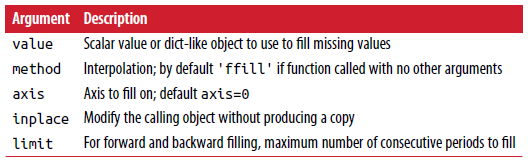
</p>

# 7.2 Data Transformation

## Removing Duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:

In [281]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})

In [282]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


The DataFrame method duplicated returns a boolean Series indicating **whether each row is a duplicate (has been observed in a previous row) or not:**

In [283]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relatedly, drop_duplicates returns a DataFrame where the duplicated array is False:

In [284]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Both of these methods by default consider all of the columns; alternatively, **you can specify any subset of them to detect duplicates**

Suppose we had an additional column of values and wanted to filter duplicates only based on the 'k1' column:

In [285]:
data['v1'] = range(7)

In [286]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [287]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated and drop_duplicates by default keep the first observed value combination

Passing keep='last' will return the last one:

In [288]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data Using a Function or Mapping

For many datasets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame

Consider the following hypothetical data collected about various kinds of meat:

In [289]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                              'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [290]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food came from

Let’s write down a mapping of each distinct meat type to the kind of animal:

In [291]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

**The map method on a Series accepts a function or dict-like object containing a mapping**, but here we have a small problem in that some of the meats are capitalized and others are not

Thus, we need to **convert each value to lowercase using the str.lower Series method:**

In [292]:
lowercased = data['food'].str.lower()

In [293]:
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [294]:
data['animal'] = lowercased.map(meat_to_animal)

In [295]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


We could also have passed a function that does all the work:

In [296]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

**Using map is a convenient way to perform element-wise transformations and other data cleaning–related operations**

## Replacing Values

Filling in missing data with the fillna method is a special case of more general value replacement

As you’ve already seen, **map can be used to modify a subset of values in an object but replace provides a simpler and more flexible way to do so**

Let’s consider this Series:


In [297]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [298]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The -999 values might be sentinel values for missing data

To replace these with NA values that pandas understands, we can use replace, producing a new Series (unless you pass inplace=True):

In [299]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

If you want to replace **multiple values at once, you instead pass a list** and then the substitute value:

In [300]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a **different replacement for each value, pass a list of substitutes:**

In [301]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The argument passed can also be a dict:

In [302]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The data.replace method is distinct from data.str.replace, which performs string substitution element-wise

## Renaming Axis Indexes

Like values in a Series, axis labels can be similarly transformed by a function or mapping of some form to produce new, differently labeled objects

You can also modify the axes in-place without creating a new data structure

Here's a simple example:

In [303]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [304]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Like a Series, the axis indexes have a map method:

In [305]:
transform = lambda x: x[:4].upper()

In [306]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

You can assign to index, modifying the DataFrame in-place:

In [307]:
data.index = data.index.map(transform)

In [308]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


If you want to create a transformed version of a dataset **without modifying the original, a useful method is rename:**

In [309]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


Notably, **rename can be used in conjunction with a dict-like object** providing new values for a subset of the axis labels:

In [310]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


**rename saves you from the chore of copying the DataFrame manually and assigning to its index and columns attributes**

Should you wish to modify a dataset in-place, pass inplace=True:

In [311]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [312]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretization and Binning

Continuous data is often discretized or otherwise separated into “bins” for analysis

Suppose you have data about a group of people in a study, and you want to group them into discrete age buckets:

In [313]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s **divide these into bins** of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older

To do so, you have to use **cut**, a function in pandas:

In [314]:
bins = [18, 25, 35, 60, 100]

In [315]:
cats = pd.cut(ages, bins)

In [316]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

**The object pandas returns is a special Categorical object**. The output you see describes the bins computed by pandas.cut

You can treat it like an array of strings indicating the bin name; **internally it contains a categories array specifying the distinct category names along with a labeling for the ages data in the codes attribute:**



In [317]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [318]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [319]:
pd.value_counts(cats).values

array([5, 3, 3, 1])

Note that pd.value_counts(cats) are the bin counts for the result of pandas.cut

Consistent with mathematical notation for intervals, **a parenthesis means that the side is open, while the square bracket means it is closed (inclusive)**

You can change which side is closed by passing right= False:

In [320]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

You can also pass your own bin names by passing a list or array to the labels option:

In [321]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [322]:
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

**If you pass an integer number of bins** to cut instead of explicit bin edges, **it will compute equal-length bins based on the minimum and maximum values in the data**

Consider the case of some uniformly distributed data chopped into fourths:

In [323]:
data = np.random.rand(20)

In [324]:
pd.cut(data, 4, precision=2)

[(0.77, 1.0], (0.54, 0.77], (0.31, 0.54], (0.77, 1.0], (0.77, 1.0], ..., (0.077, 0.31], (0.77, 1.0], (0.31, 0.54], (0.31, 0.54], (0.54, 0.77]]
Length: 20
Categories (4, interval[float64]): [(0.077, 0.31] < (0.31, 0.54] < (0.54, 0.77] < (0.77, 1.0]]

The precision=2 option limits the decimal precision to two digits

A closely related function, qcut, bins the data based on sample quantiles

Depending on the distribution of the data, using cut will not usually result in each bin having the same number of data points

Since qcut uses sample quantiles instead, by definition you will obtain roughly equal-size bins:

In [325]:
data = np.random.randn(1000) # Normally distributed

In [326]:
cats = pd.qcut(data, 4) # Cut into quartiles

In [327]:
cats

[(0.0354, 0.707], (0.0354, 0.707], (-3.6319999999999997, -0.619], (-0.619, 0.0354], (-3.6319999999999997, -0.619], ..., (0.0354, 0.707], (-3.6319999999999997, -0.619], (0.0354, 0.707], (-3.6319999999999997, -0.619], (0.707, 2.881]]
Length: 1000
Categories (4, interval[float64]): [(-3.6319999999999997, -0.619] < (-0.619, 0.0354] < (0.0354, 0.707] <
                                    (0.707, 2.881]]

In [328]:
pd.value_counts(cats)

(0.707, 2.881]                   250
(0.0354, 0.707]                  250
(-0.619, 0.0354]                 250
(-3.6319999999999997, -0.619]    250
dtype: int64

Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive):

In [329]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.0354, 1.328], (0.0354, 1.328], (-1.223, 0.0354], (-1.223, 0.0354], (-1.223, 0.0354], ..., (0.0354, 1.328], (-3.6319999999999997, -1.223], (0.0354, 1.328], (-1.223, 0.0354], (1.328, 2.881]]
Length: 1000
Categories (4, interval[float64]): [(-3.6319999999999997, -1.223] < (-1.223, 0.0354] < (0.0354, 1.328] <
                                    (1.328, 2.881]]

These discretization functions are especially useful for quantile and group analysis

## Detecting and Filtering Outliers

Filtering or transforming outliers is largely a matter of applying array operations

Consider a DataFrame with some normally distributed data:

In [330]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [331]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.034066,0.048845,0.011025,-0.005823
std,1.018080,1.009296,0.997368,1.008561
min,-3.929146,-3.407598,-2.841289,-3.548090
25%,-0.656831,-0.612901,-0.639162,-0.667259
50%,0.048879,0.073402,-0.019457,-0.003365
75%,0.721818,0.767091,0.690757,0.667233
max,3.107870,2.630253,2.855052,3.192168


Suppose you wanted to find values in one of the columns exceeding 3 in absolute value:

In [332]:
col = data[2]

In [333]:
col[np.abs(col) > 3]

Series([], Name: 2, dtype: float64)

To select all rows having a value exceeding 3 or –3, you can use the any method on a boolean DataFrame:

In [334]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
59,-3.929146,-0.178411,0.394801,0.418571
272,-0.844894,1.163822,1.174635,3.192168
291,-0.559970,-3.407598,1.145049,0.382111
548,-3.431546,-1.012892,-0.185423,0.000102
613,0.960431,0.772824,-0.620691,-3.504356
848,3.107870,0.777681,0.009108,0.339043
974,-1.096388,0.078967,0.592753,-3.548090


Values can be set based on these criteria. Here is code to cap values outside the interval –3 to 3:

In [335]:
data[np.abs(data) > 3] = np.sign(data) * 3

In [336]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.035318,0.049253,0.011025,-0.004963
std,1.013172,1.007980,0.997368,1.004558
min,-3.000000,-3.000000,-2.841289,-3.000000
25%,-0.656831,-0.612901,-0.639162,-0.667259
50%,0.048879,0.073402,-0.019457,-0.003365
75%,0.721818,0.767091,0.690757,0.667233
max,3.000000,2.630253,2.855052,3.000000


The statement np.sign(data) produces 1 and –1 values based on whether the values in data are positive or negative:

In [337]:
np.sign(data).head()

,0,1,2,3
0,-1.0,1.0,-1.0,1.0
1,1.0,1.0,1.0,-1.0
2,-1.0,-1.0,-1.0,1.0
3,1.0,-1.0,1.0,1.0
4,-1.0,-1.0,1.0,1.0


## Permutation and Random Sampling

Permuting (randomly reordering) a Series or the rows in a DataFrame is easy to do using the numpy.random.permutation function

Calling permutation with the length of the axis you want to permute produces an array of integers indicating the new ordering:

In [338]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [339]:
sampler = np.random.permutation(5)

In [340]:
sampler

array([3, 1, 4, 0, 2])

That array can then be used in iloc-based indexing or the equivalent take function:

In [341]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [342]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
4,16,17,18,19
0,0,1,2,3
2,8,9,10,11


**To select a random subset without replacement, you can use the sample method on Series and DataFrame:**

In [343]:
df.sample(n=3)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


To generate a sample with replacement (to allow repeat choices), pass replace=True to sample:

In [344]:
choices = pd.Series([5, 7, -1, 6, 4])

In [345]:
draws = choices.sample(n=10, replace=True)

In [346]:
draws

4    4
3    6
3    6
1    7
2   -1
1    7
1    7
0    5
0    5
3    6
dtype: int64

## Computing Indicator/Dummy Variables

Another type of transformation for statistical modeling or machine learning applications is converting a categorical variable into a “dummy” or “indicator” matrix

If a column in a DataFrame has k distinct values, you would derive a matrix or Data. Frame with k columns containing all 1s and 0s

pandas has a get_dummies function for doing this, though devising one yourself is not difficult. Let’s return to an earlier example DataFrame:

In [350]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})

In [352]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [351]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In some cases, you may want to add a prefix to the columns in the indicator DataFrame, which can then be merged with the other data.get_dummies has a prefix argument for doing this:

In [353]:
dummies = pd.get_dummies(df['key'], prefix='key')